<a id="Import"></a>
# <p style="background-color: #0093af; font-family:Pacifico; color:#ffffff; font-size:200%; font-family:Pacifico; text-align:center; border-radius:1000px 50px;">Breast Cancer Detection Model</p>

# <font size= '6' color='DodgerBlue'>▶ Table Of Contents</font>

* [1. Importing Libraries](#1)
* [2. Load & Understand the dataset](#2)
* [3. Handling Missing Values](#3)
* [4. Handling Outliers](#4)
* [5. Splitting The Dataset](#5)
* [6. Feature Scaling](#6)
* [7. Training our Machine Learning Model](#7)
* [8. Models Test Scores & Evaluation](#8)

<a id="1"></a>
# <font size= '6' color='DodgerBlue'>▶ Importing Libraries</font>

In [1]:
# Data Science Tools
import numpy as np
import pandas as pd

# Data Visualization Tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
import sweetviz as sv
import time

# Scikit-Learn Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

# Warnings
import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>
# <font size= '6' color='DodgerBlue'>▶ Load & Understand The Dataset</font>

In [2]:
Data = pd.read_csv("Breast_Cancer_Dataset.csv")

# Comma-Separated Values (CSV)
# Age  ,  Name     ,  Target
# 21   ,  John     ,   200
# 22   ,  Sara     ,   500
# 23   ,  Olivia   ,   700

In [3]:
Data.shape # Dimensions (rows, columns) "Attribute"

(569, 33)

In [4]:
Data.head(10) # first 10 rows/records  "Method"

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
Data.tail(10) # last 10 rows/records  "Method"

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732,NaN
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321,NaN
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905,NaN
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090,NaN
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873,NaN
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039,NaN


In [6]:
Data.columns  # "Attribute"

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [7]:
Data.dtypes  # "Attribute"

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

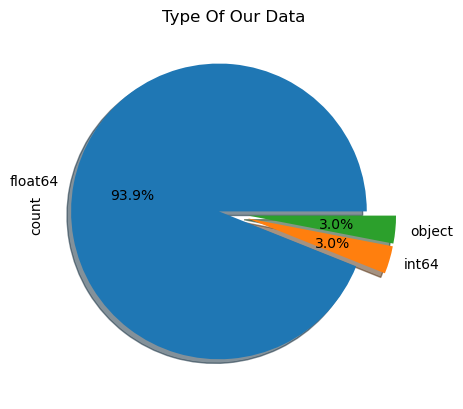

In [8]:
Data.dtypes.value_counts().plot.pie(explode=[0.1,0.1, 0.1], autopct="%1.1f%%", shadow=True)
plt.title("Type Of Our Data");

In [9]:
Data.info()  # "Method"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
Data.describe().style.background_gradient(cmap="Blues")  # "Method"

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.000000
mean,30371831.432337,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,nan
std,125020585.612224,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,nan
min,8670.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,nan
25%,869218.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,nan
50%,906024.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,nan
75%,8813129.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,nan
max,911320502.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,nan


In [11]:
# My_Report = sv.analyze(Data)
# My_Report.show_notebook(w=None, h=None, scale=None, layout="widescreen", filepath=None)

# <font size= '6' color='DodgerBlue'>Removing Irrelevant Features</font>

In [12]:
Data.drop(["id","Unnamed: 32"], inplace=True, axis=1)
print("Shape of the dataset after dropping : ", Data.shape)

Shape of the dataset after dropping :  (569, 31)


In [13]:
Data.columns  # "Attribute"

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="3"></a>
# <font size= '6' color='DodgerBlue'>▶ Handling Missing Values</font>

In [14]:
if Data.isnull().values.any():
    print("Unfortunately, there are missing values in the dataset\n") 
else:
    print("Fortunately, there aren't missing values in the dataset.")

Fortunately, there aren't missing values in the dataset.


<a id="4"></a>
# <font size= '6' color='DodgerBlue'>▶ Handling Outliers</font>

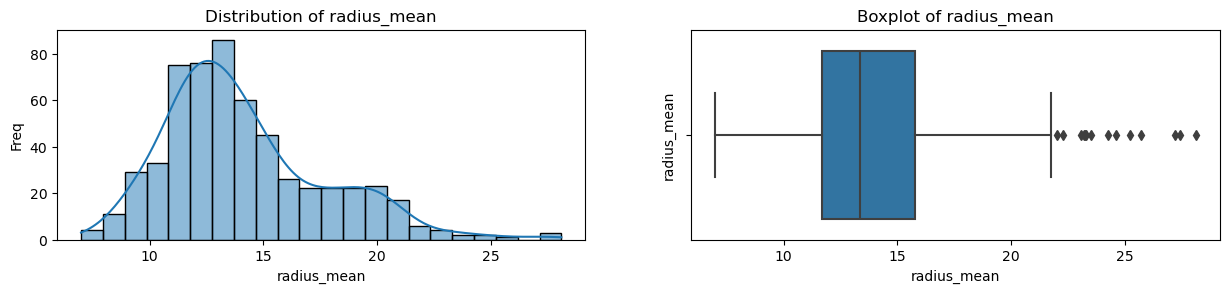

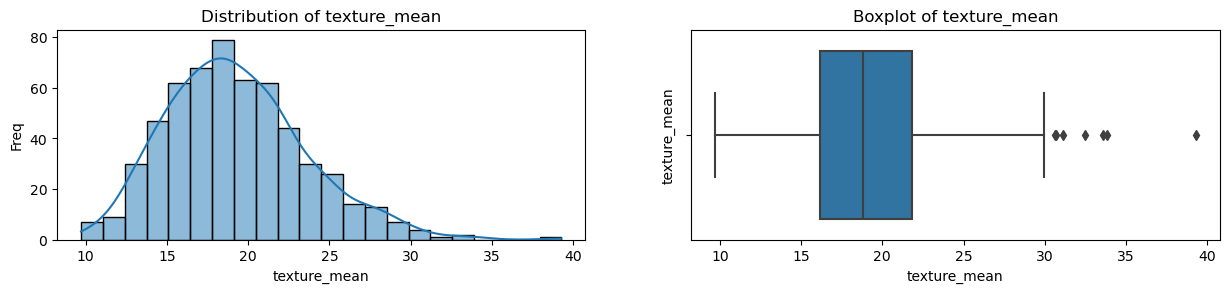

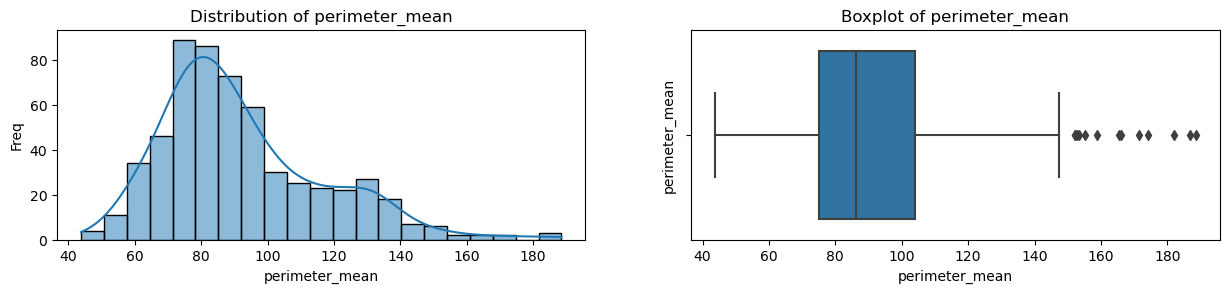

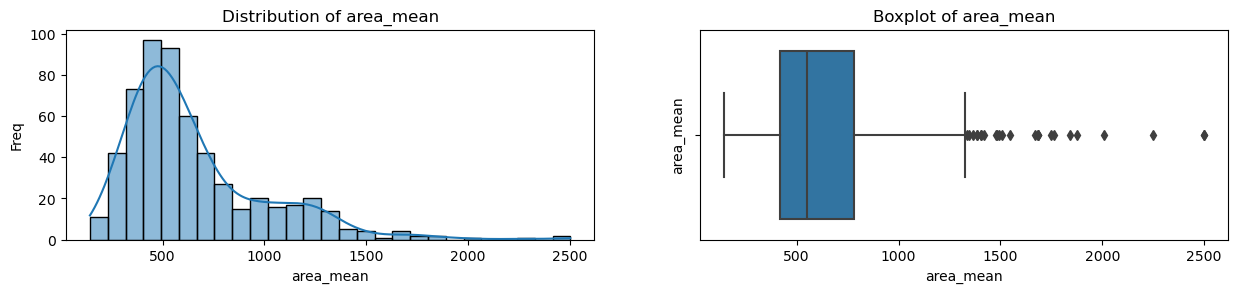

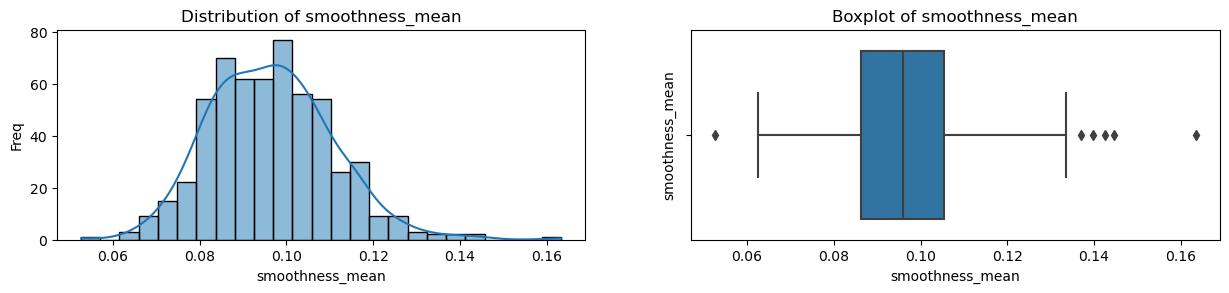

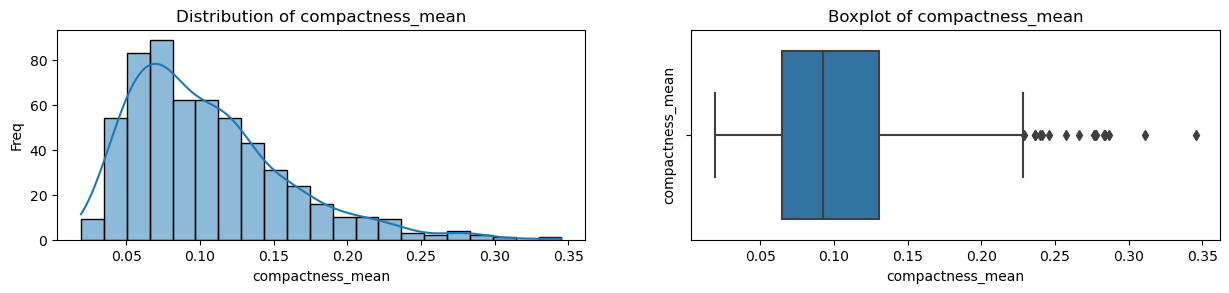

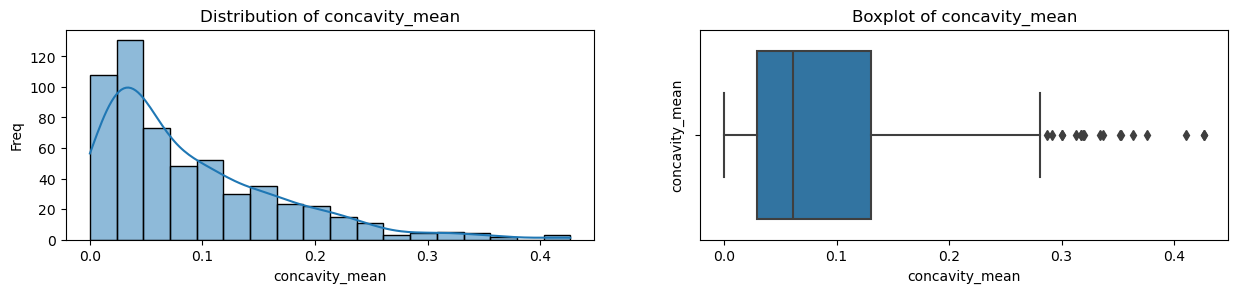

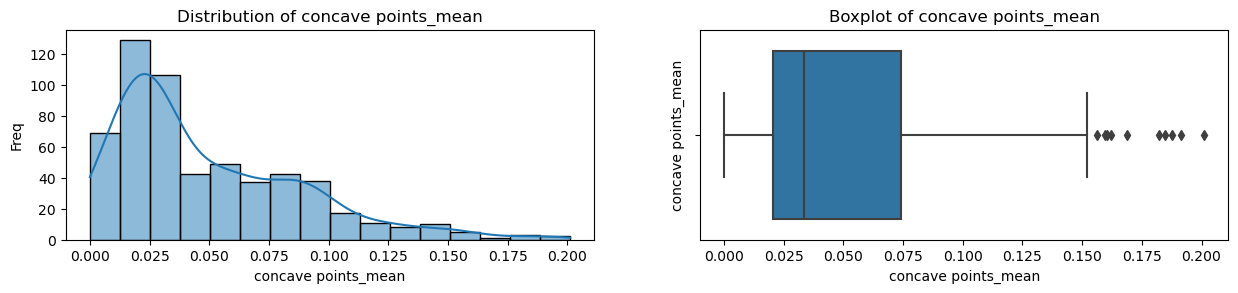

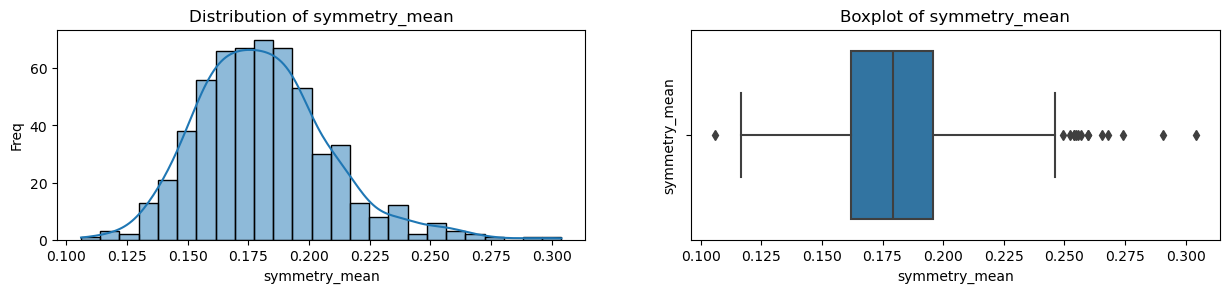

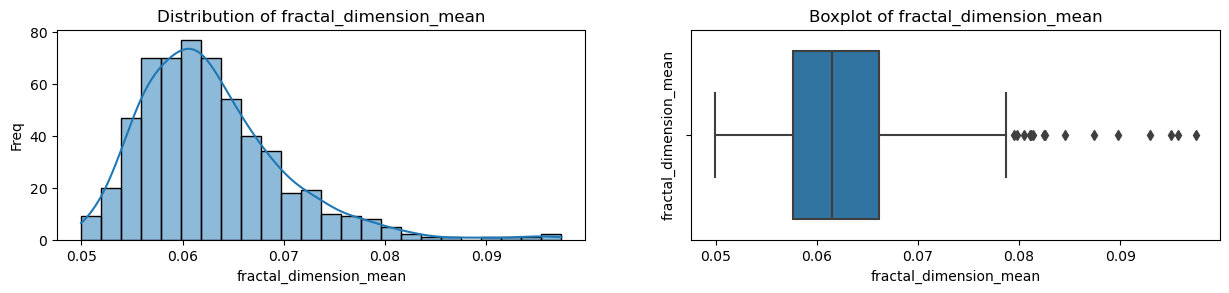

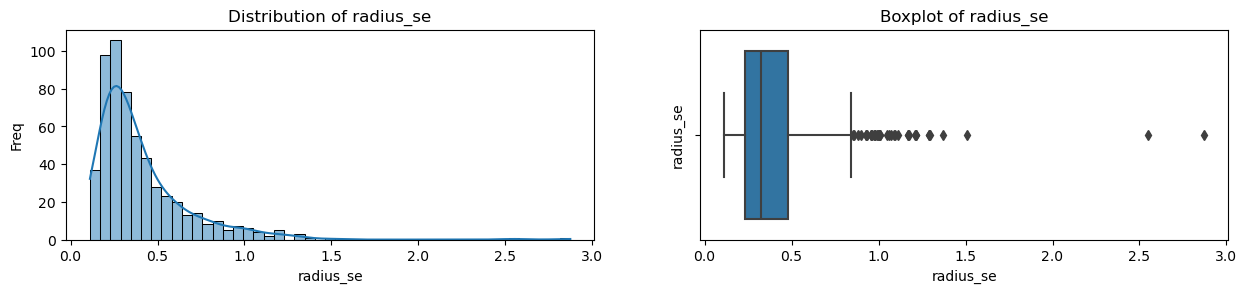

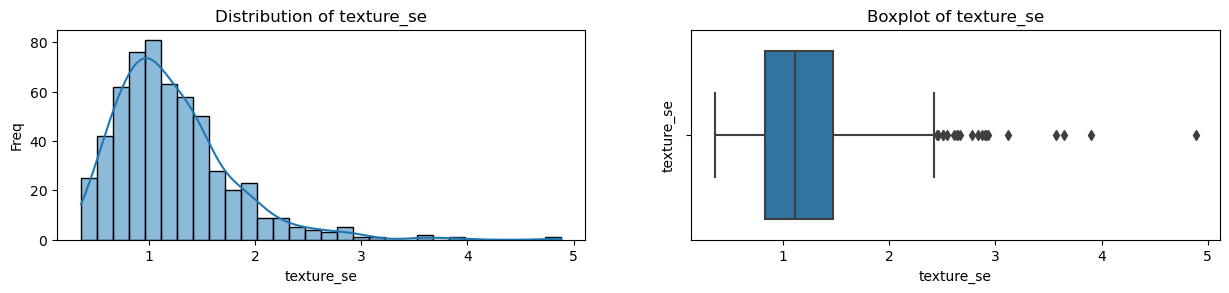

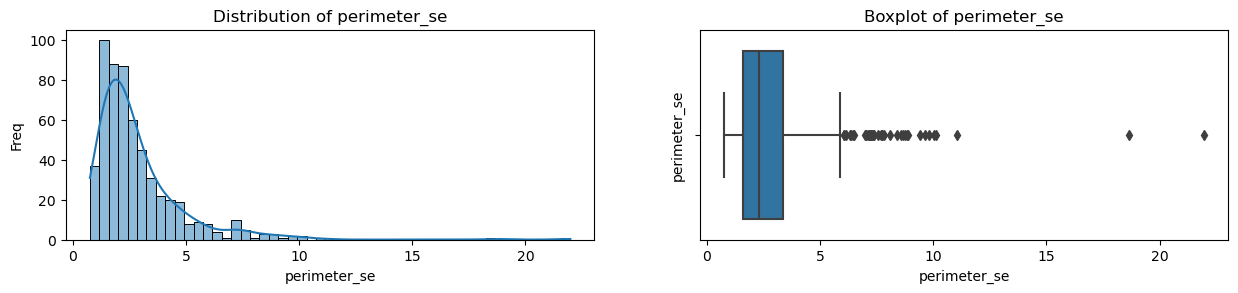

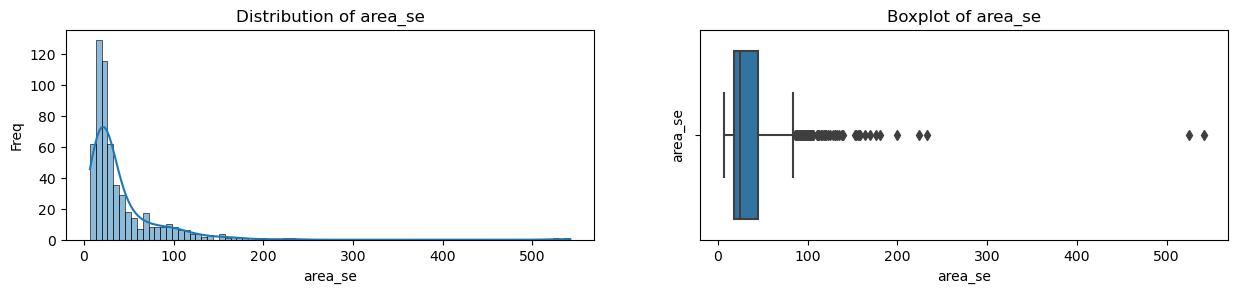

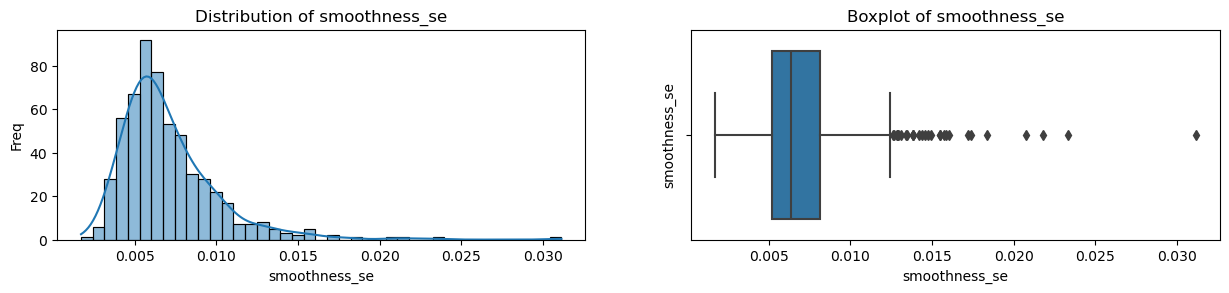

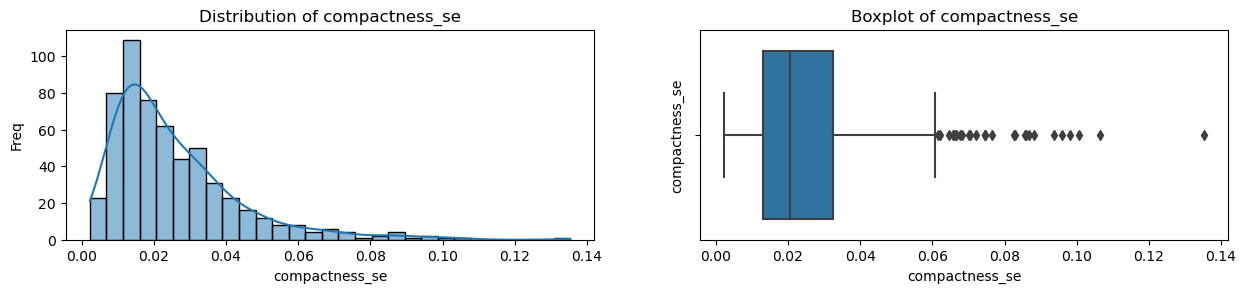

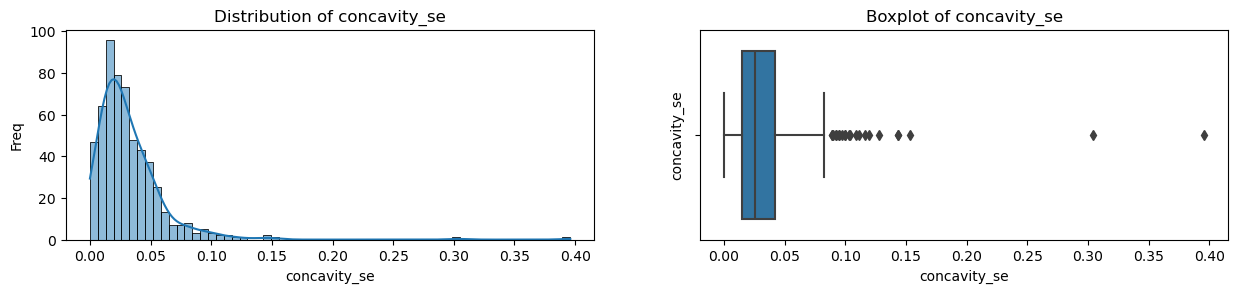

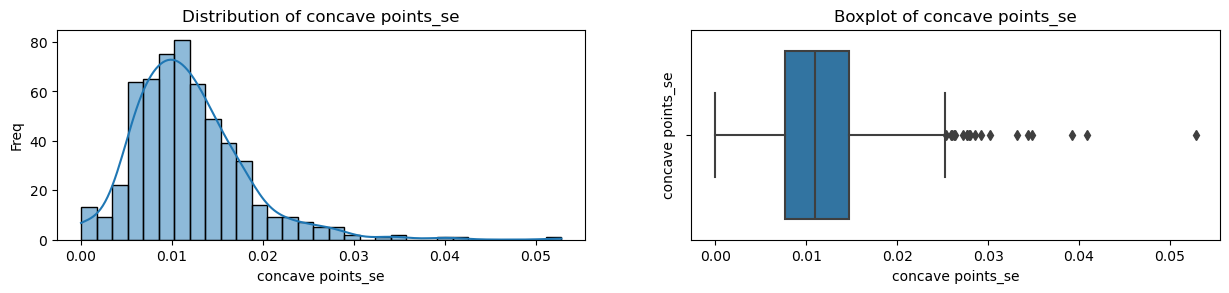

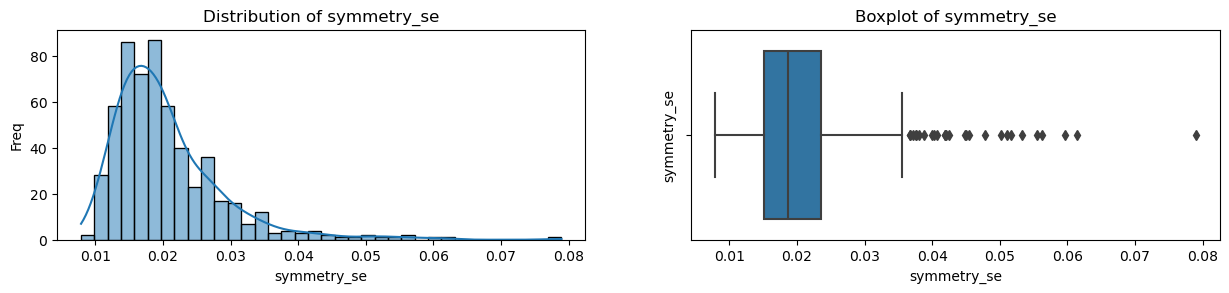

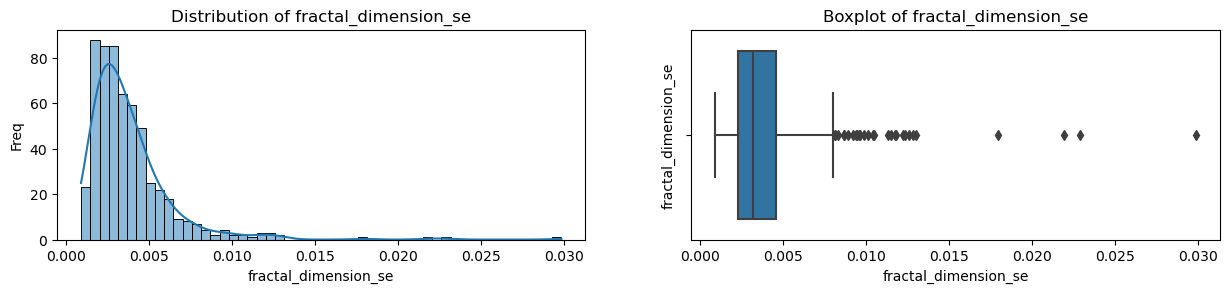

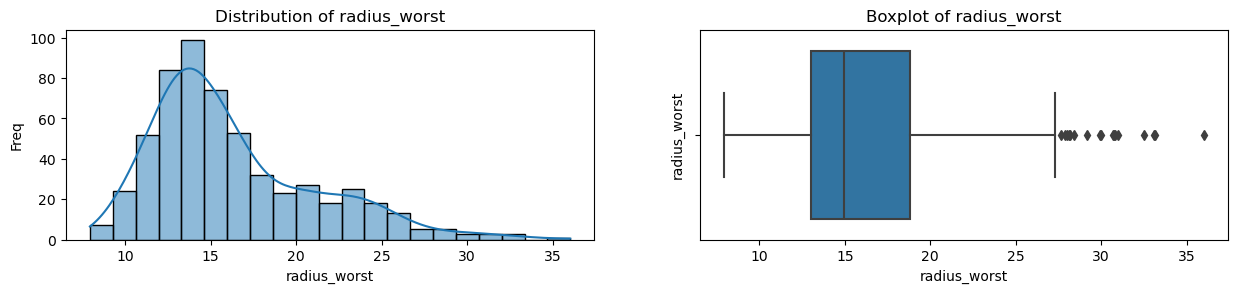

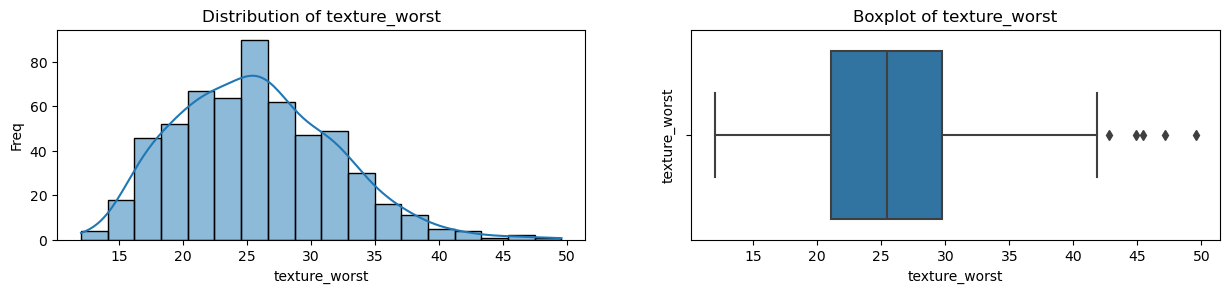

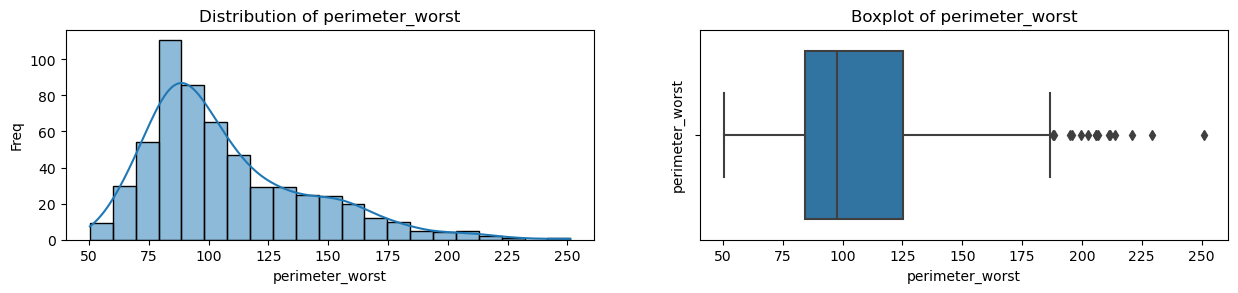

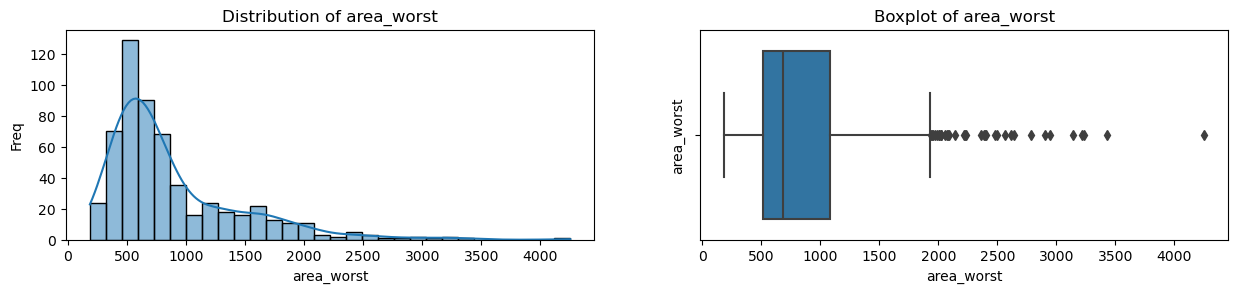

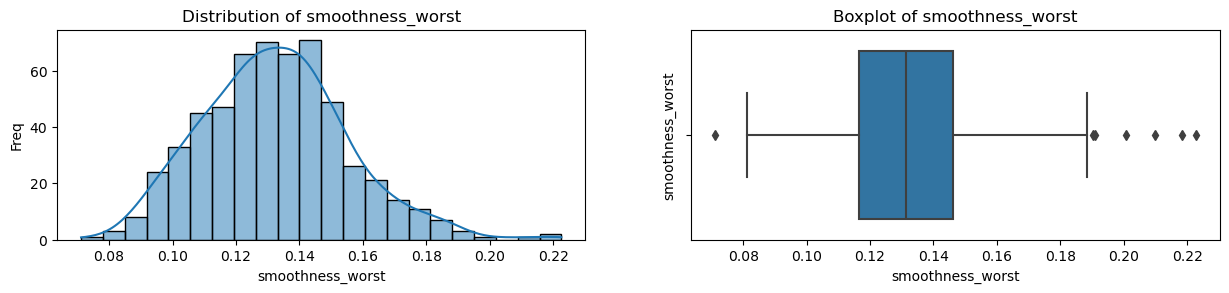

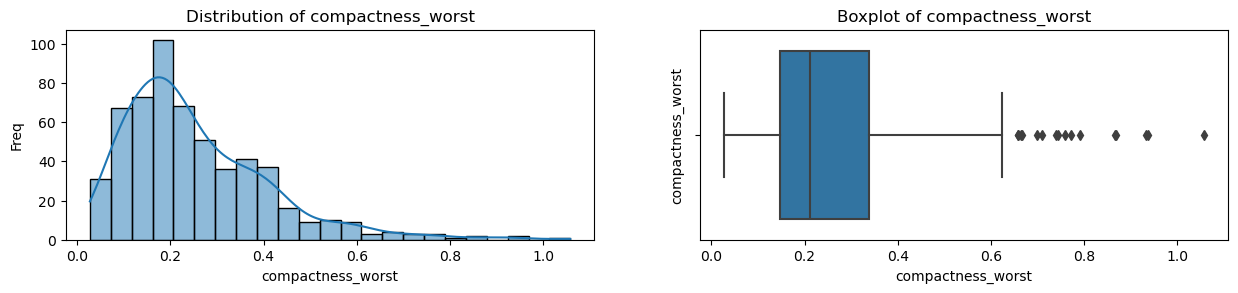

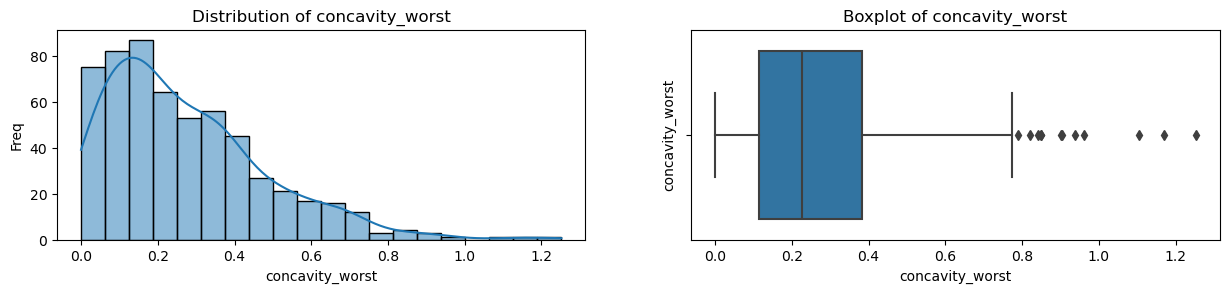

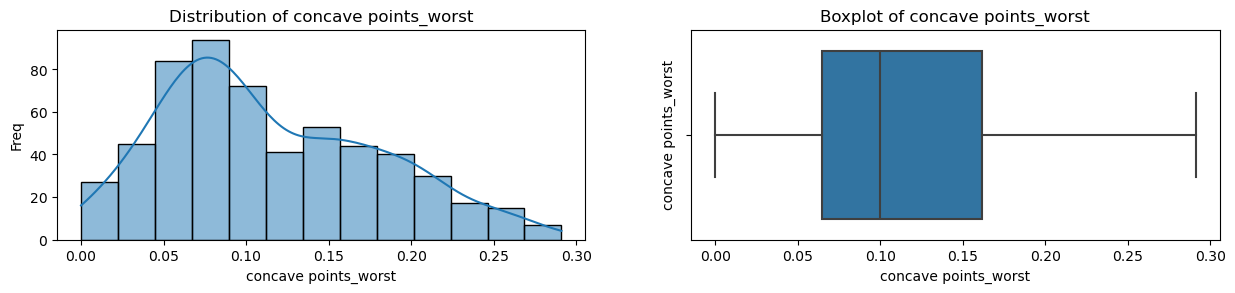

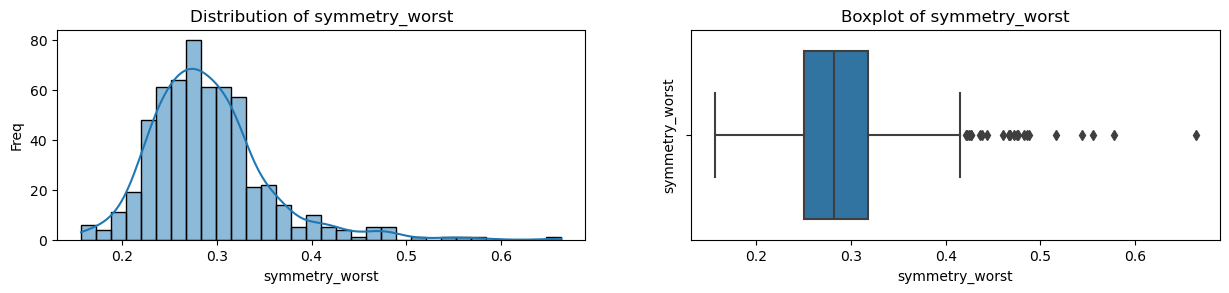

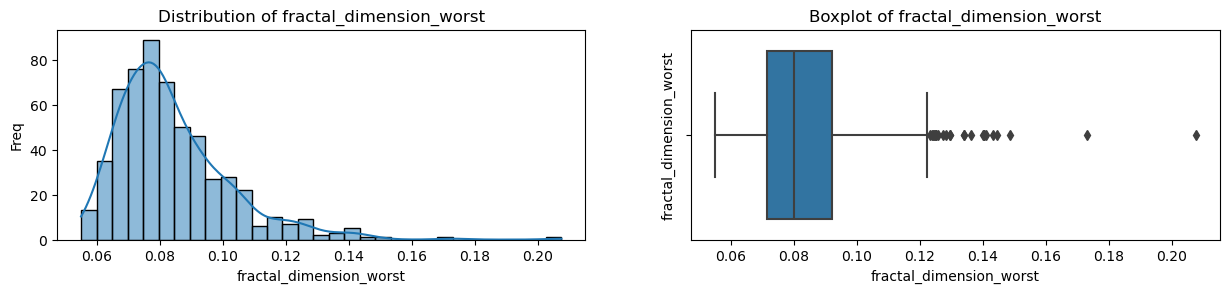

In [15]:
# Outliers = Unusual Values

for column in Data.columns:
    if Data[column].dtype!="object":
        plt.figure(figsize=(15, 6))
        plt.subplot(2, 2, 1)
        sns.histplot(data=Data, x=column, kde=True)
        plt.ylabel("Freq")
        plt.xlabel(column)
        plt.title(f"Distribution of {column}")
        plt.subplot(2, 2, 2)
        sns.boxplot(data=Data, x=column)
        plt.ylabel(column)
        plt.title(f"Boxplot of {column}")
        plt.show()

In [16]:
# Z-Score Normalization 
# Calculate Z-scores for each feature

Data["diagnosis"].replace({"B":0, "M":1}, inplace=True)

Z_Scores = (Data - Data.mean()) / Data.std()
Threshold = 3    # Is a commonly used standard
Outliers = (Z_Scores > Threshold) | (Z_Scores < -Threshold)

# Check if there are any outliers
if Outliers.any().any():
    print("Outliers detected in the dataset. Removing them...")
    
    # Remove Outliers
    Data = Data[~Outliers.any(axis=1)]
    Data.reset_index(drop=True, inplace=True)
    
    print("Outliers removed. Data shape:", Data.shape)
else:
    print("No outliers detected in the dataset.")

Outliers detected in the dataset. Removing them...
Outliers removed. Data shape: (495, 31)


In [17]:
# scatter_matrix(Data, figsize=(50, 50));

# We can come to various conclusion looking at these plots for example:
# If you observe 5th plot in pregnancies with insulin, you can conclude that women with higher number 
# of pregnancies have lower insulin

In [18]:
Data.columns  # "Attribute"

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# Analysis and exploration of categories of the "diagnosis" feature
# check labels in "diagnosis" feature

Data["diagnosis"].replace({0:"Benign", 1:"Malignant"}, inplace=True)
Data["diagnosis"].unique()

# B = Benign = 0
# M = Malignant = 1

array(['Malignant', 'Benign'], dtype=object)

In [20]:
Data["diagnosis"].value_counts()

# B = Benign = 0
# M = Malignant = 1

diagnosis
Benign       332
Malignant    163
Name: count, dtype: int64

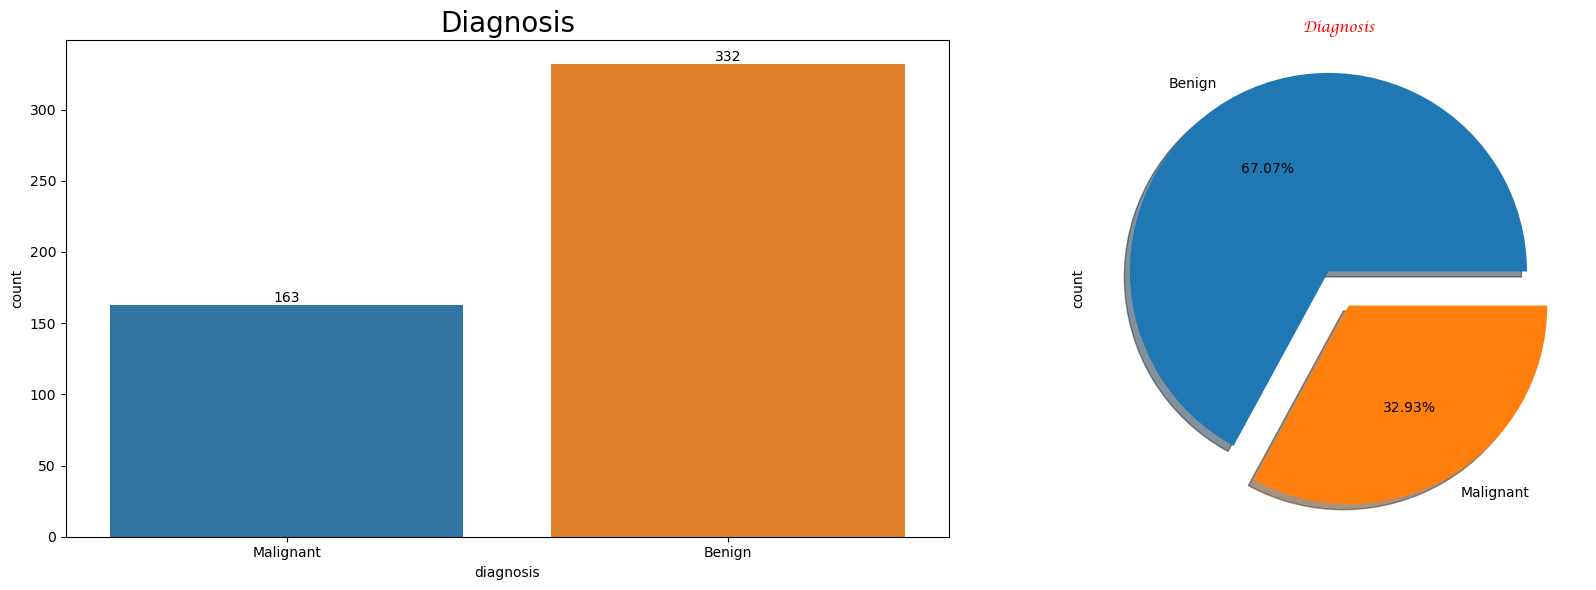

In [21]:
# Set the figure size
plt.figure(figsize=(18, 6))

# First Subplot
Left_Shape = plt.subplot(1, 2, 1)
sns.countplot(x="diagnosis", data=Data)
Left_Shape.bar_label(Left_Shape.containers[0])
Left_Shape.set_title("Diagnosis", fontsize=20)

# Second Subplot
Right_Shape = plt.subplot(1, 2, 2)
Data["diagnosis"].value_counts().plot.pie(explode=[0.1, 0.1], autopct="%1.2f%%", shadow=True)
Right_Shape.set_title(label="Diagnosis", fontsize=50, color="Red", font="Lucida Calligraphy")

plt.tight_layout()
plt.show()

# B = Benign = 0
# M = Malignant = 1

In [22]:
Data["diagnosis"].replace({"Benign":0, "Malignant":1}, inplace=True)

In [23]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

Data.corr().style.background_gradient(cmap="coolwarm").format("{:.3f}")

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000,0.741,0.407,0.754,0.746,0.304,0.602,0.753,0.791,0.294,-0.066,0.630,-0.004,0.618,0.696,-0.078,0.309,0.390,0.458,-0.114,0.121,0.796,0.443,0.801,0.785,0.388,0.584,0.688,0.780,0.383,0.316
radius_mean,0.741,1.000,0.304,0.998,0.992,0.105,0.530,0.725,0.817,0.128,-0.373,0.663,-0.121,0.654,0.794,-0.299,0.252,0.358,0.462,-0.208,0.001,0.973,0.282,0.967,0.953,0.085,0.459,0.604,0.753,0.176,0.044
texture_mean,0.407,0.304,1.000,0.310,0.310,-0.023,0.239,0.320,0.282,0.071,-0.075,0.327,0.421,0.336,0.333,0.045,0.235,0.262,0.219,0.011,0.117,0.333,0.909,0.341,0.332,0.080,0.259,0.304,0.277,0.098,0.112
perimeter_mean,0.754,0.998,0.310,1.000,0.991,0.138,0.574,0.758,0.841,0.154,-0.332,0.674,-0.117,0.671,0.802,-0.283,0.291,0.391,0.487,-0.197,0.036,0.975,0.289,0.973,0.956,0.114,0.497,0.635,0.777,0.196,0.083
area_mean,0.746,0.992,0.310,0.991,1.000,0.108,0.522,0.732,0.821,0.134,-0.353,0.697,-0.099,0.686,0.827,-0.254,0.254,0.365,0.460,-0.182,0.018,0.973,0.283,0.967,0.968,0.094,0.444,0.597,0.743,0.171,0.046
smoothness_mean,0.304,0.105,-0.023,0.138,0.108,1.000,0.632,0.465,0.509,0.517,0.590,0.274,0.096,0.259,0.228,0.357,0.252,0.233,0.380,0.113,0.295,0.162,0.027,0.179,0.162,0.794,0.404,0.366,0.446,0.332,0.458
compactness_mean,0.602,0.530,0.239,0.574,0.522,0.632,1.000,0.868,0.825,0.513,0.466,0.513,-0.017,0.561,0.539,0.071,0.731,0.674,0.653,0.041,0.540,0.573,0.243,0.618,0.558,0.555,0.869,0.809,0.811,0.449,0.666
concavity_mean,0.753,0.725,0.320,0.758,0.732,0.465,0.868,1.000,0.939,0.402,0.185,0.644,0.012,0.672,0.709,0.009,0.628,0.740,0.670,-0.023,0.411,0.755,0.325,0.785,0.752,0.442,0.766,0.898,0.877,0.361,0.485
concave points_mean,0.791,0.817,0.282,0.841,0.821,0.509,0.825,0.939,1.000,0.400,0.077,0.707,-0.012,0.714,0.777,-0.022,0.482,0.559,0.675,-0.049,0.277,0.839,0.285,0.856,0.832,0.436,0.674,0.782,0.910,0.343,0.363
symmetry_mean,0.294,0.128,0.071,0.154,0.134,0.517,0.513,0.402,0.400,1.000,0.371,0.292,0.110,0.295,0.247,0.209,0.330,0.267,0.310,0.353,0.280,0.168,0.080,0.187,0.169,0.390,0.381,0.326,0.345,0.661,0.343


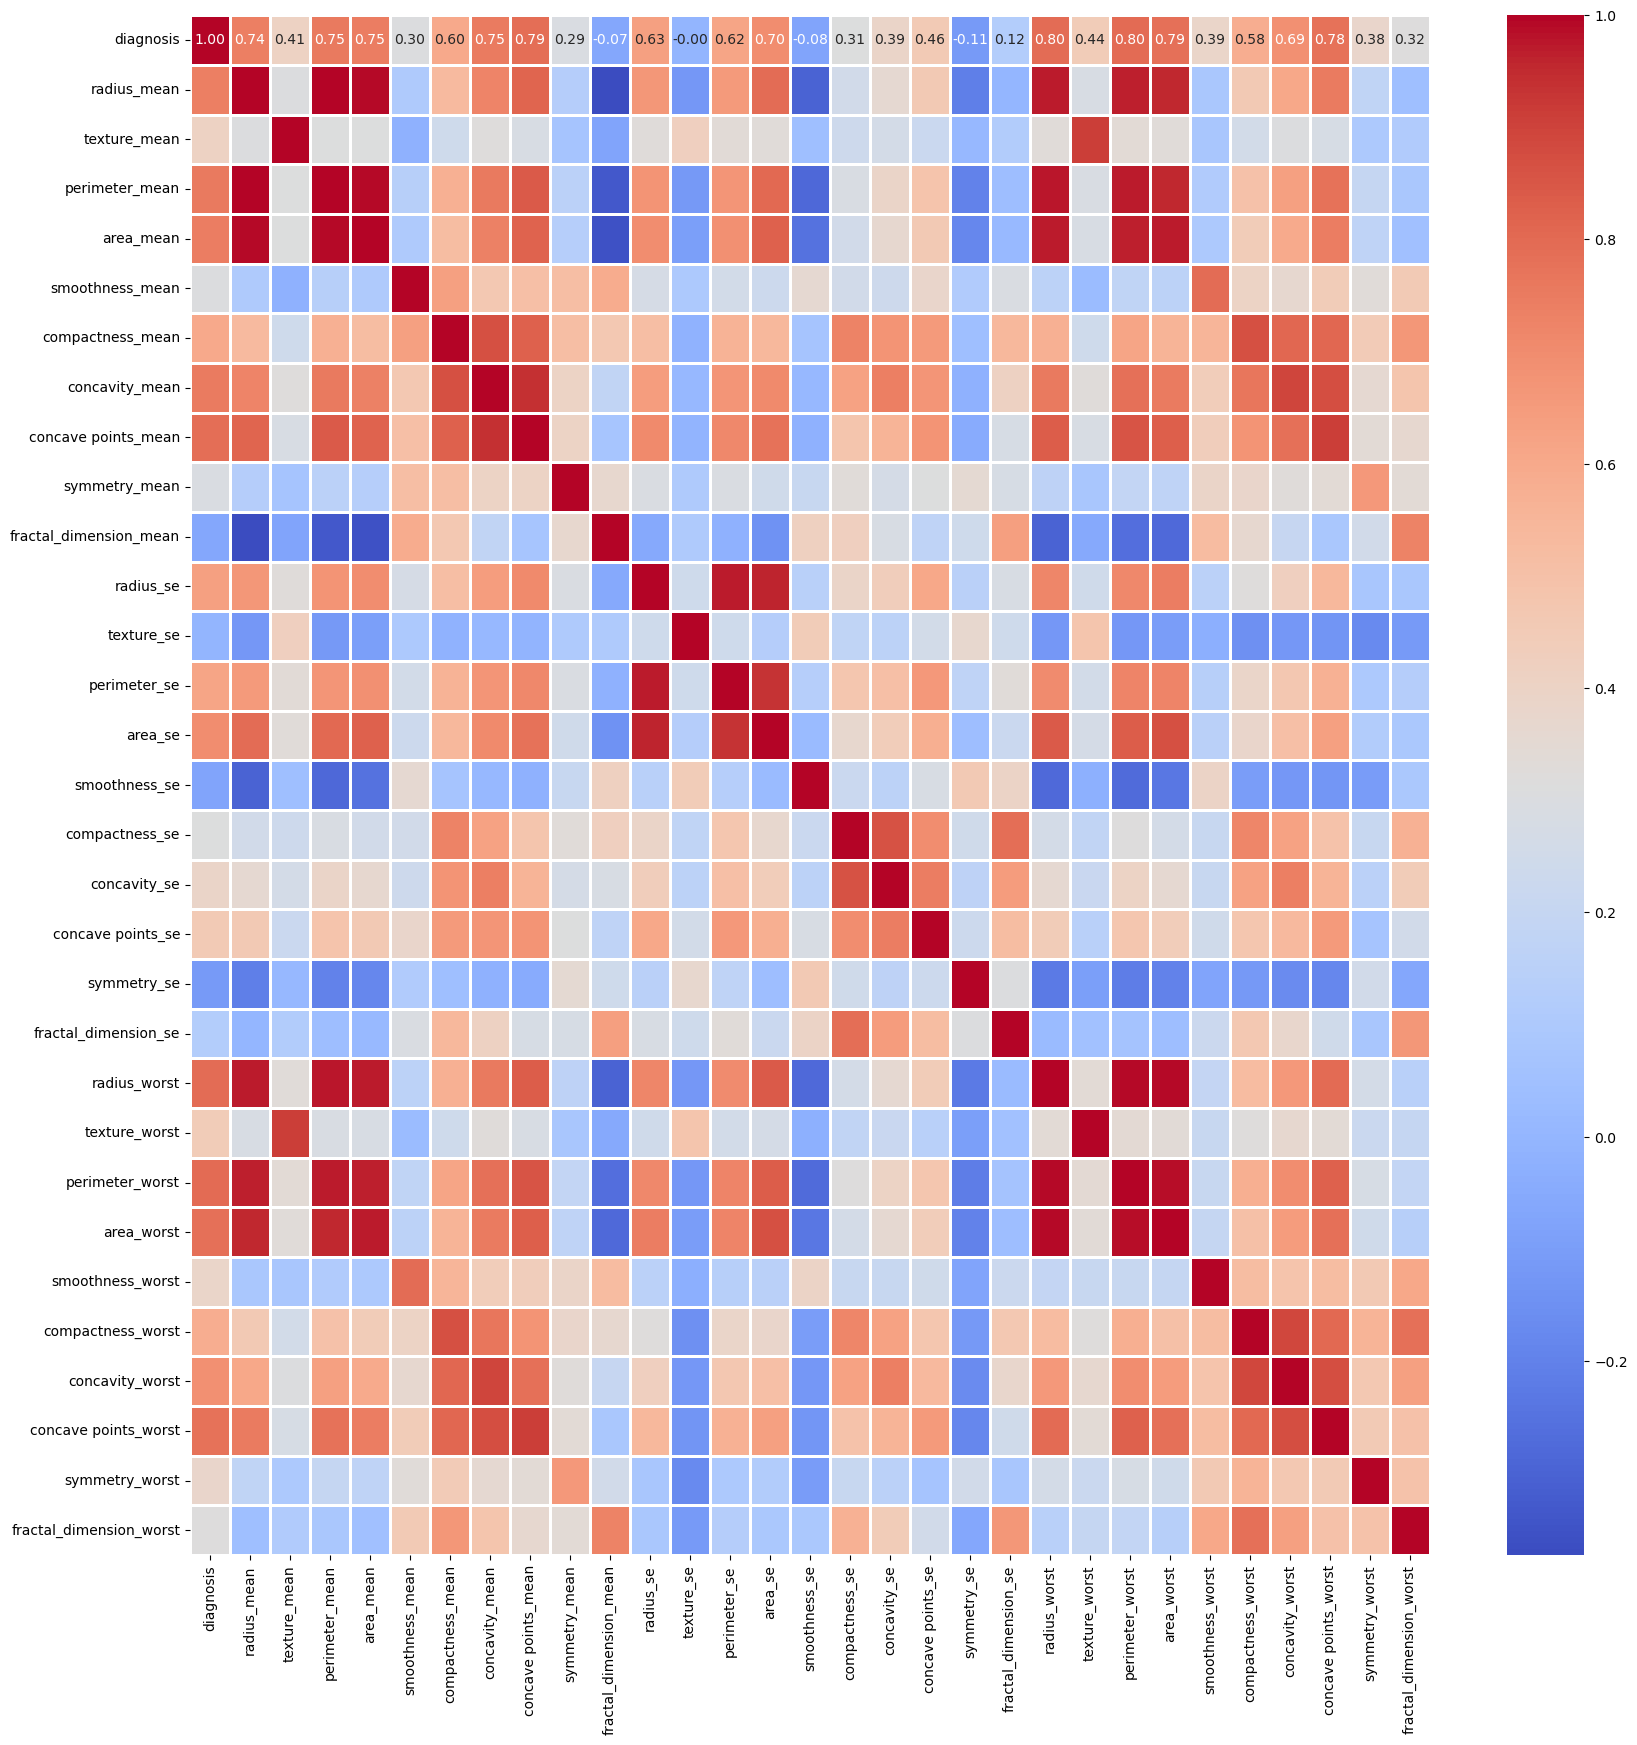

In [24]:
# Bivariate Analysis

plt.figure(figsize=(20, 20))
sns.heatmap(Data.corr(), annot=True, linewidths=0.9, fmt=".2f", cmap="coolwarm")
plt.show()

In [25]:
# The correlation between each feature and the "Outcome"
# Bivariate Analysis

Corr = Data[["diagnosis", "radius_mean", "texture_mean", "perimeter_mean",
       "area_mean", "smoothness_mean", "compactness_mean", "concavity_mean",
       "concave points_mean", "symmetry_mean", "fractal_dimension_mean",
       "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se",
       "compactness_se", "concavity_se", "concave points_se", "symmetry_se",
       "fractal_dimension_se", "radius_worst", "texture_worst",
       "perimeter_worst", "area_worst", "smoothness_worst",
       "compactness_worst", "concavity_worst", "concave points_worst",
       "symmetry_worst", "fractal_dimension_worst"]].corr()["diagnosis"].sort_values(ascending = False)

Corr = Corr.to_frame()
Corr.style.background_gradient(cmap="coolwarm")

,diagnosis
diagnosis,1.000000
perimeter_worst,0.801401
radius_worst,0.795813
concave points_mean,0.790748
area_worst,0.785407
concave points_worst,0.779945
perimeter_mean,0.754245
concavity_mean,0.752845
area_mean,0.745664
radius_mean,0.741254


In [26]:
# Dropping feature/s based on the correlation
# These features are the least correlated with "diagnosis"

Data.drop(["fractal_dimension_se", "texture_se", "fractal_dimension_mean", "smoothness_se", "symmetry_se"], inplace=True, axis=1)

In [27]:
Data.head() # Default : first 5 rows

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [28]:
Data.tail() # Default : last 5 rows

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
490,0,14.05,27.15,91.38,600.4,0.09929,0.1126,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
491,1,20.92,25.09,143.00,1347.0,0.10990,0.2236,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
492,1,21.56,22.39,142.00,1479.0,0.11100,0.1159,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
493,1,20.13,28.25,131.20,1261.0,0.09780,0.1034,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637
494,1,16.60,28.08,108.30,858.1,0.08455,0.1023,0.09251,0.05302,0.1590,...,18.98,34.12,126.7,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820


In [29]:
Data.shape # Dimensions (rows, columns)

(495, 26)

In [30]:
Data.columns  # "Attribute"

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

<a id="5"></a>
# <font size= '6' color='DodgerBlue'>▶ Splitting The Dataset</font>

In [31]:
# X Data
X = Data.drop(["diagnosis"], axis=1)
print("X shape is : ", X.shape)

# y Data
y = Data["diagnosis"]
print("y shape is : ", y.shape)

X shape is :  (495, 25)
y shape is :  (495,)


In [32]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Splitted Data
print("X_train shape is ", X_train.shape)
print("X_val shape is ", X_val.shape)
print("y_train shape is ", y_train.shape)
print("y_val shape is ", y_val.shape)

X_train shape is  (396, 25)
X_val shape is  (99, 25)
y_train shape is  (396,)
y_val shape is  (99,)


<a id="6"></a>
# <font size= '6' color='DodgerBlue'>▶ Feature Scaling</font>

In [33]:
# Standardization (Z-Score Normalization) 
# StandardScaler For Data

Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_val = Scaler.transform(X_val)

**1. Applying "Logistic Regression" Algorithm**

In [34]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)
y_train_pred_LR = Model_LR.predict(X_train)
y_val_pred_LR = Model_LR.predict(X_val)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_LR)
Val_Accuracy_LR = accuracy_score(y_val, y_val_pred_LR)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Validating Accuracy: {Val_Accuracy_LR*100:.2f} %")

Training Accuracy: 98.23 %
Validating Accuracy: 97.98 %


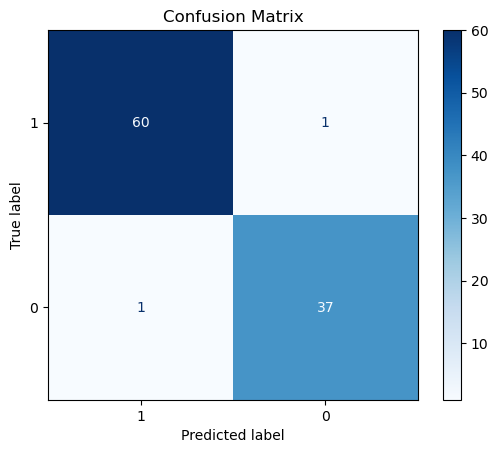

In [35]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_LR)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["diagnosis"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [36]:
print(classification_report(y_val, y_val_pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        61
           1       0.97      0.97      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.98      0.98        99
weighted avg       0.98      0.98      0.98        99



Execution Time Of Model: 0.0 Seconds



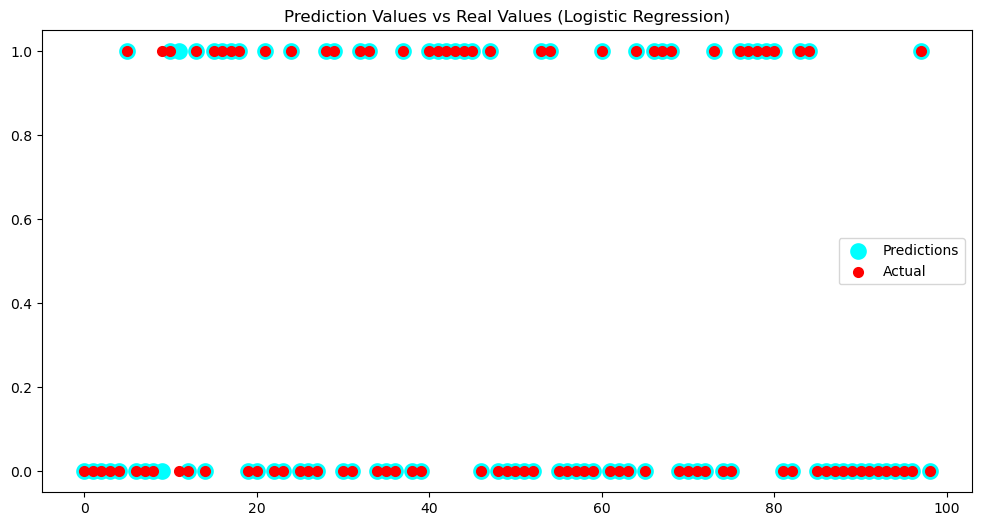

In [37]:
Start = time.time()
End = time.time()
Model_LR_Time = End - Start
print(f"Execution Time Of Model: {round((Model_LR_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_val_pred_LR)), y_val_pred_LR, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_val)), y_val, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Logistic Regression)")
plt.legend()
plt.show()

**2. Applying "k-Nearest Neighbors (k-NN)" Algorithm**

In [38]:
Model_KNN = KNeighborsClassifier(n_neighbors=5)
Model_KNN.fit(X_train, y_train)
y_train_pred_KNN = Model_KNN.predict(X_train)
y_val_pred_KNN = Model_KNN.predict(X_val)

# Quick evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_KNN)
Val_Accuracy_KNN = accuracy_score(y_val, y_val_pred_KNN)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Validating Accuracy: {Val_Accuracy_KNN*100:.2f} %")

Training Accuracy: 97.73 %
Validating Accuracy: 98.99 %


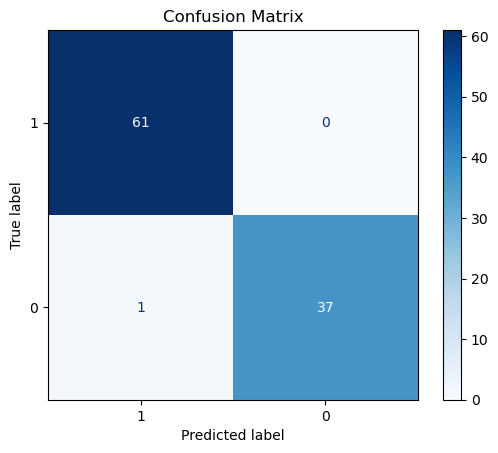

In [39]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_KNN)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["diagnosis"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [40]:
print(classification_report(y_val, y_val_pred_KNN))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        38

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



Execution Time Of Model: 0.0 Seconds



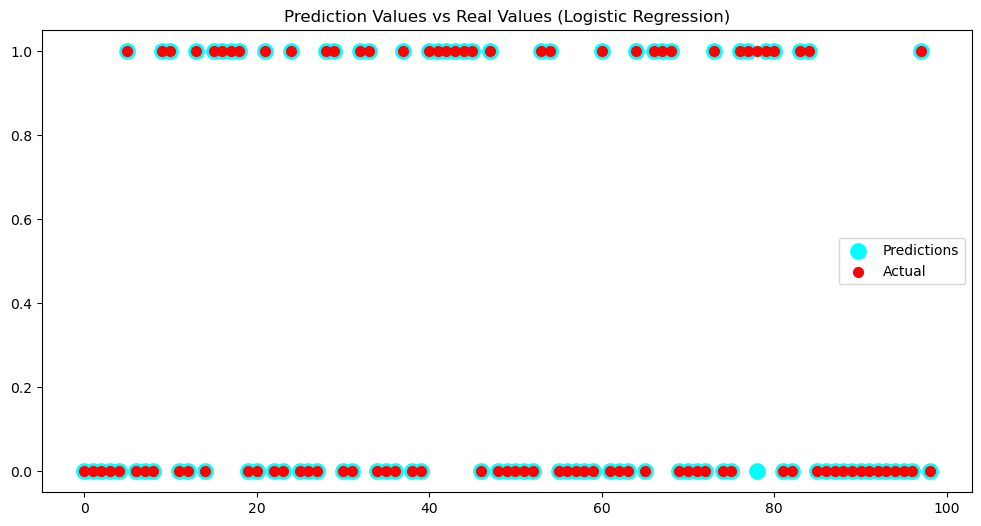

In [41]:
Start = time.time()
End = time.time()
Model_KNN_Time = End - Start
print(f"Execution Time Of Model: {round((Model_KNN_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_val_pred_KNN)), y_val_pred_KNN, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_val)), y_val, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Logistic Regression)")
plt.legend()
plt.show()

**3. Applying "Support Vector Machines" Algorithm**

In [42]:
Model_SVC = SVC(kernel="linear")
Model_SVC.fit(X_train, y_train)
y_train_pred_SVC = Model_SVC.predict(X_train)
y_val_pred_SVC = Model_SVC.predict(X_val)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_SVC)
Val_Accuracy_SVC = accuracy_score(y_val, y_val_pred_SVC)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Validating Accuracy: {Val_Accuracy_SVC*100:.2f} %")

Training Accuracy: 98.23 %
Validating Accuracy: 98.99 %


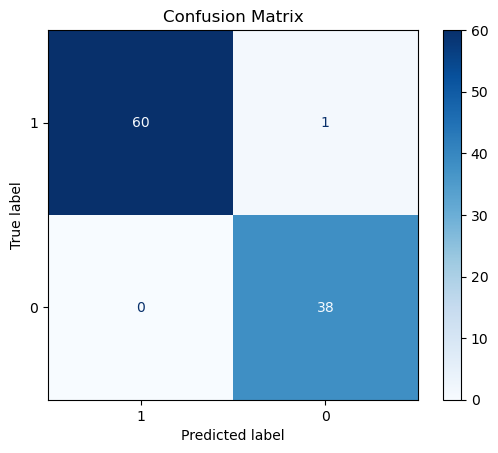

In [43]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_SVC)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["diagnosis"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [44]:
print(classification_report(y_val, y_val_pred_SVC))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        61
           1       0.97      1.00      0.99        38

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



Execution Time Of Model: 0.0 Seconds



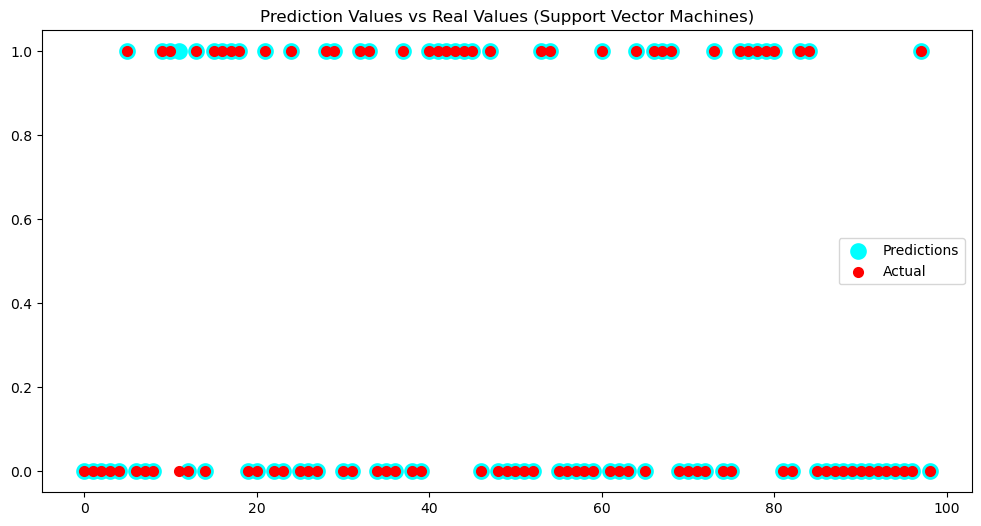

In [45]:
Start = time.time()
End = time.time()
Model_SVC_Time = End - Start
print(f"Execution Time Of Model: {round((Model_SVC_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_val_pred_SVC)), y_val_pred_SVC, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_val)), y_val, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Support Vector Machines)")
plt.legend()
plt.show()

**4. Applying "Random Forests" Algorithm**

In [46]:
Model_RF = RandomForestClassifier(random_state=42, max_depth=5)
Model_RF.fit(X_train, y_train)
y_train_pred_RF = Model_RF.predict(X_train)
y_val_pred_RF = Model_RF.predict(X_val)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_RF)
Val_Accuracy_RF = accuracy_score(y_val, y_val_pred_RF)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Validating Accuracy: {Val_Accuracy_RF*100:.2f} %")

Training Accuracy: 98.99 %
Validating Accuracy: 98.99 %


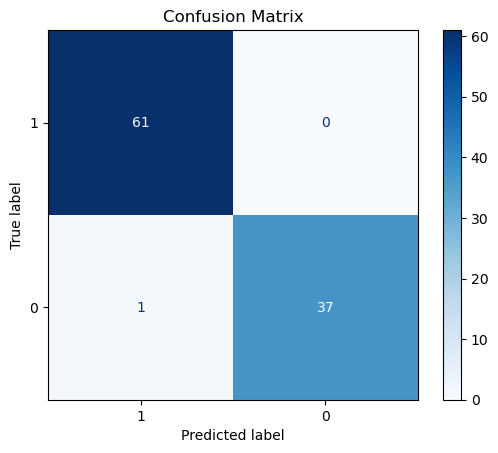

In [47]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_RF)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data['diagnosis'].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [48]:
print(classification_report(y_val, y_val_pred_RF))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        61
           1       1.00      0.97      0.99        38

    accuracy                           0.99        99
   macro avg       0.99      0.99      0.99        99
weighted avg       0.99      0.99      0.99        99



Execution Time Of Model: 0.0 Seconds



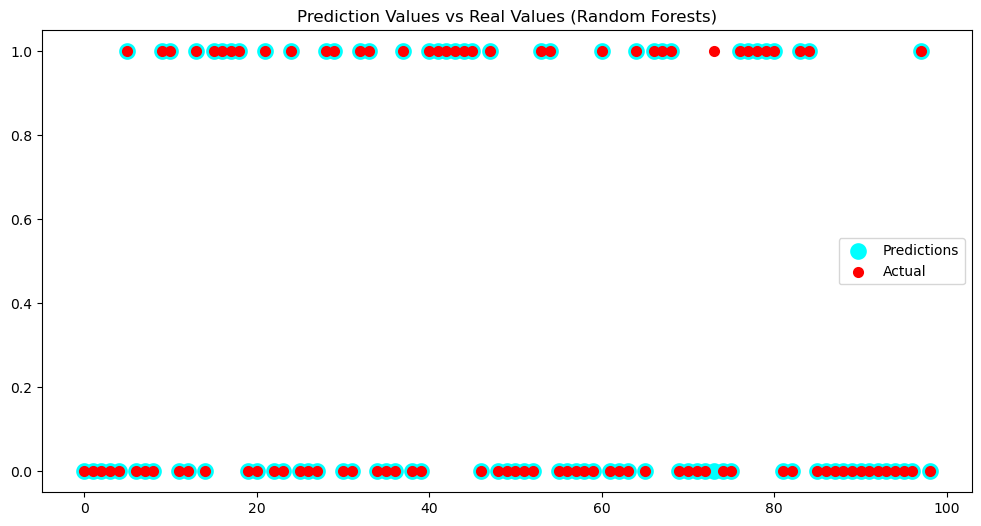

In [49]:
Start = time.time()
End = time.time()
Model_RF_Time = End - Start
print(f"Execution Time Of Model: {round((Model_RF_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_val_pred_RF)), y_val_pred_RF, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_val)), y_val, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (Random Forests)")
plt.legend()
plt.show()

**5. Applying "XGBoost" Algorithm**

In [50]:
Model_XGB = XGBClassifier(max_depth=3, learning_rate=0.02, n_estimators=50, objective='binary:logistic')
Model_XGB.fit(X_train, y_train)
y_train_pred_XGB = Model_XGB.predict(X_train)
y_val_pred_XGB = Model_XGB.predict(X_val)

# Quick Evaluation
Train_Accuracy = accuracy_score(y_train, y_train_pred_XGB)
Val_Accuracy_XGB = accuracy_score(y_val, y_val_pred_XGB)
print(f"Training Accuracy: {Train_Accuracy*100:.2f} %")
print(f"Validating Accuracy: {Val_Accuracy_XGB*100:.2f} %")

Training Accuracy: 98.48 %
Validating Accuracy: 97.98 %


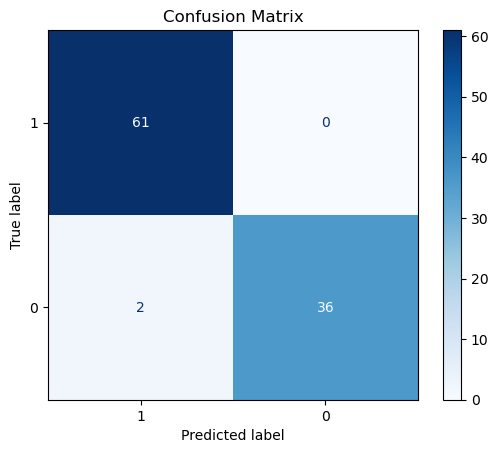

In [51]:
# Model Evaluation: Confusion Matrix

CM = confusion_matrix(y_true=y_val, y_pred=y_val_pred_XGB)
Disp = ConfusionMatrixDisplay(CM, display_labels=Data["diagnosis"].unique())
fig, ax = plt.subplots()
Disp.plot(cmap="Blues", ax=ax)
ax.grid(False)
plt.title("Confusion Matrix")
plt.show()

In [52]:
print(classification_report(y_val, y_val_pred_XGB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        61
           1       1.00      0.95      0.97        38

    accuracy                           0.98        99
   macro avg       0.98      0.97      0.98        99
weighted avg       0.98      0.98      0.98        99



Execution Time Of Model: 0.0 Seconds



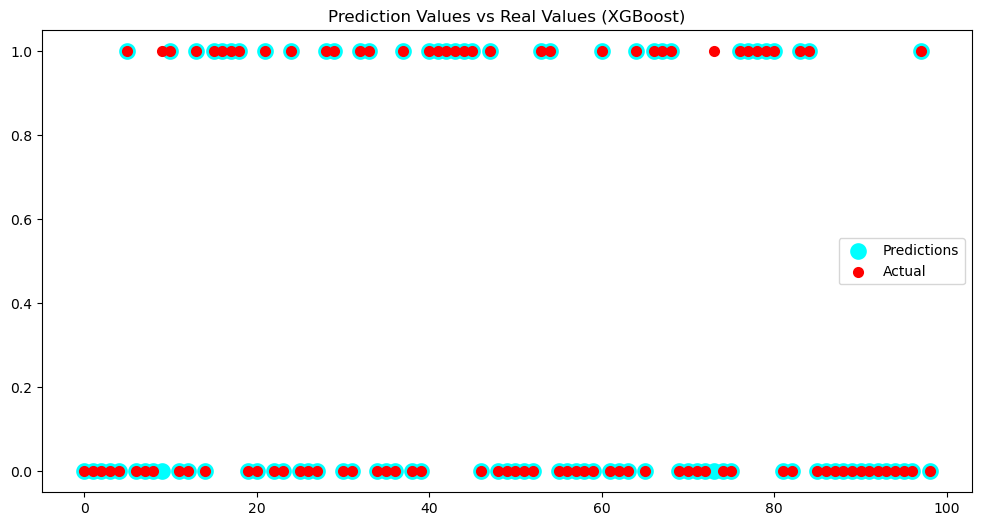

In [53]:
Start = time.time()
End = time.time()
Model_XGB_Time = End - Start
print(f"Execution Time Of Model: {round((Model_XGB_Time), 5)} Seconds\n")

# Plot And Compute Metrics
plt.figure(figsize=(12,6))
plt.scatter(range(len(y_val_pred_XGB)), y_val_pred_XGB, color="Cyan", lw=6, label="Predictions")
plt.scatter(range(len(y_val)), y_val, color="red", lw=2, label="Actual")
plt.title("Prediction Values vs Real Values (XGBoost)")
plt.legend()
plt.show()

<a id="8"></a>
# <font size= '6' color='DodgerBlue'>▶ Models Test Scores & Evaluation</font>

In [54]:
Models = pd.DataFrame({"Model": ["Logistic Regression","KNN", "SVM", "Random Forests", "XGBoost"],
                       
                       "Score": [(Val_Accuracy_LR * 100), (Val_Accuracy_KNN * 100), 
                                 (Val_Accuracy_SVC * 100), (Val_Accuracy_RF * 100), 
                                 (Val_Accuracy_XGB * 100)]})

Models.sort_values(by="Score", ascending=False).style.background_gradient(cmap="Blues")

,Model,Score
1,KNN,98.989899
2,SVM,98.989899
3,Random Forests,98.989899
0,Logistic Regression,97.979798
4,XGBoost,97.979798


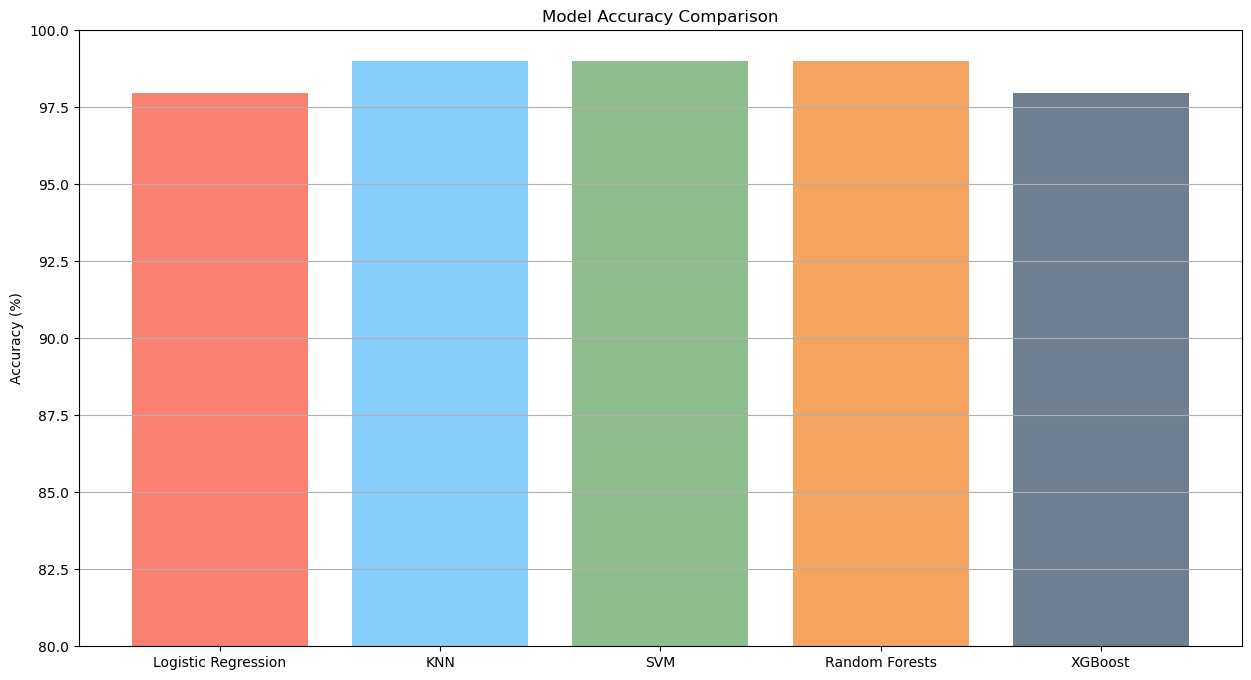

In [55]:
Classifiers = ["Logistic Regression","KNN", "SVM", "Random Forests", "XGBoost"]

Accuracies = [(Val_Accuracy_LR * 100), (Val_Accuracy_KNN * 100), 
              (Val_Accuracy_SVC * 100), (Val_Accuracy_RF * 100), (Val_Accuracy_XGB * 100)]

plt.figure(figsize=(15, 8))

plt.bar(Classifiers, Accuracies, color=["Salmon", "LightSkyBlue", "DarkSeaGreen", "SandyBrown", 
                                       "SlateGray"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(80, 100)
plt.grid(axis="y", alpha=1)
plt.show()

<center><img src="https://cdn.dribbble.com/users/126069/screenshots/2253470/screengif7.gif" style='width: 10%:'></center>